In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

In [2]:
df = pd.read_csv('results/q1_20_q2_30_phase_space_Galla_N.csv')

In [3]:
df

,pi,lambda,f0,f1,f2,sdf0,sdf1,sdf2,Q,sdQ,m
0,0.05,0.05,0.228793,0.279101,0.492106,0.014094,0.018248,0.020213,-0.066097,0.056709,0.238159
1,0.05,0.10,0.185906,0.263052,0.551042,0.013393,0.018927,0.021278,0.024939,0.059133,0.326563
2,0.05,0.15,0.153696,0.230618,0.615686,0.012219,0.016689,0.018933,0.154451,0.052311,0.423529
3,0.05,0.20,0.130258,0.214900,0.654842,0.011366,0.019312,0.020864,0.225042,0.059487,0.482263
4,0.05,0.25,0.111530,0.187463,0.701008,0.010521,0.020020,0.022430,0.326082,0.062469,0.551512
...,...,...,...,...,...,...,...,...,...,...,...
185,0.50,0.75,0.037193,0.200850,0.761956,0.005970,0.020573,0.021180,0.360256,0.062326,0.642934
186,0.50,0.80,0.036691,0.178617,0.784691,0.006009,0.016932,0.017741,0.427457,0.051604,0.677037
187,0.50,0.85,0.035996,0.141193,0.822810,0.005857,0.018597,0.019324,0.540423,0.056518,0.734215
188,0.50,0.90,0.035534,0.099583,0.864883,0.005793,0.015287,0.016434,0.665716,0.047009,0.797324


In [4]:
df1 = df.loc[df['pi'] == 0.05].loc[df['lambda'] == 0.05]

In [5]:
df.loc[(df['pi'] == 0.05) & (df['lambda'] == 0.05)]

,pi,lambda,f0,f1,f2,sdf0,sdf1,sdf2,Q,sdQ,m
0,0.05,0.05,0.228793,0.279101,0.492106,0.014094,0.018248,0.020213,-0.066097,0.056709,0.238159


In [6]:
df1

,pi,lambda,f0,f1,f2,sdf0,sdf1,sdf2,Q,sdQ,m
0,0.05,0.05,0.228793,0.279101,0.492106,0.014094,0.018248,0.020213,-0.066097,0.056709,0.238159


In [4]:
df_to_map = df.pivot('lambda','pi','Q')

<AxesSubplot:xlabel='$\\pi_{1,2}$', ylabel='$\\lambda$'>

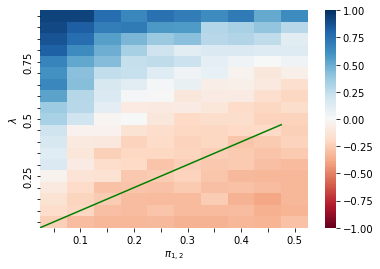

In [5]:
fig, ax = plt.subplots()
x_ticks = ['',0.1,'',0.2,'',0.3,'',0.4,'',0.5]
y_ticks = ['','','','',0.25,'','','','',0.5,'','','','',0.75,'','','','']
sns.heatmap(df_to_map, vmin=-1,vmax=1, cmap='RdBu', ax=ax, xticklabels=x_ticks, yticklabels=y_ticks)
ax.invert_yaxis()
ax.set_xlabel(r"$\pi_{1,2}$")
ax.set_ylabel(r"$\lambda$")
some_line = pd.DataFrame({'pi':[x for x in range(len(x_ticks))], 'lambda':[x for x in range(len(x_ticks))]})
sns.lineplot(x=some_line['pi'], y=some_line['lambda'], color='green')

In [5]:
pi = df['pi'].unique()
lamb = df['lambda'].unique()
z = []
for i,p in enumerate(pi):
    z.append([])
    for l in lamb:
        value = df_to_map.loc[l].loc[p]
        z[i].append(value)

In [6]:
z = np.array(z)

In [7]:
#x_edges, y_edges = np.mgrid[0.05:0.5:10j, 0.05:0.95:19j]
x_edges, y_edges = np.mgrid[min(pi):max(pi):complex(0,len(pi)), min(lamb):max(lamb):complex(0,len(lamb))]

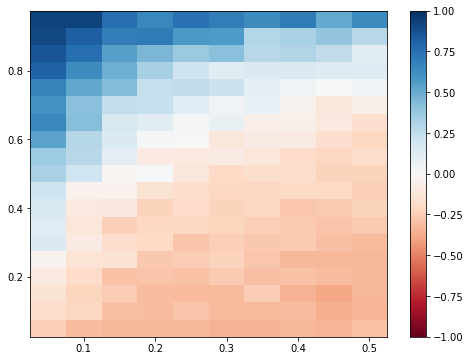

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.pcolormesh(x_edges, y_edges, z, cmap='RdBu', vmin=-1,vmax=1, shading='auto')
fig.colorbar(im, ax=ax)

In [9]:
tck = interpolate.bisplrep(x_edges, y_edges, z)
xnew, ynew = np.mgrid[0.05:0.5:46j, 0.05:0.95:91j]
pi_new = [round(x[0],2) for x in xnew]
lamb_new = [round(y,2) for y in ynew[0]]
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

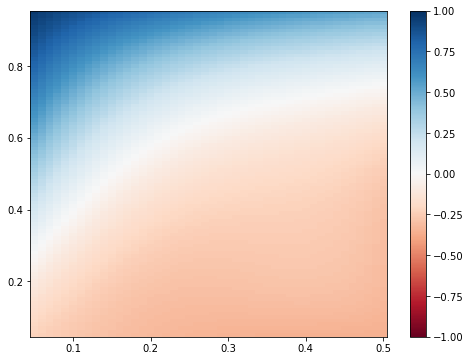

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
im = plt.pcolormesh(xnew, ynew, znew, cmap='RdBu', vmin=-1,vmax=1, shading='auto')
#index_from = list(df_Tline['pi']).index(xnew[0][0])
#print(index_from)
#plt.plot(list(df_Tline['pi'])[index_from:], list(df_Tline['lambda'])[index_from:])
fig.colorbar(im, ax=ax)

In [18]:
df_spline = pd.DataFrame(data=None, columns=['pi', 'lambda', 'Q'])
for i,p in enumerate(pi_new):
    for j,l in enumerate(lamb_new):
        df_aux = pd.DataFrame({'pi':[p,], 'lambda':[l,], 'Q':[znew[i][j],]})
        df_spline = pd.concat([df_spline,df_aux],ignore_index=True) # ,ignore_index=True

In [19]:
df_to_map_spline = df_spline.pivot('lambda','pi','Q')

Text(33.0, 0.5, '$\\lambda$')

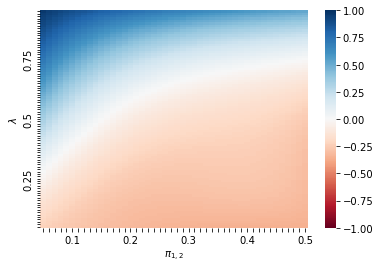

In [20]:
fig, ax = plt.subplots()
x_ticks_must = [0.1,0.2,0.3,0.4,0.5]
x_ticks = []
y_ticks_must = [0.25,0.5,0.75]
y_ticks = []
for x in pi_new:
    if x in x_ticks_must:
        x_ticks.append(x)
    else:
        x_ticks.append('')
for y in lamb_new:
    if y in y_ticks_must:
        y_ticks.append(y)
    else:
        y_ticks.append('')
sns.heatmap(df_to_map_spline, vmin=-1,vmax=1, cmap='RdBu', ax=ax, xticklabels=x_ticks, yticklabels=y_ticks)
ax.invert_yaxis()
ax.set_xlabel(r"$\pi_{1,2}$")
ax.set_ylabel(r"$\lambda$")

In [22]:
def get_Tline(magnitud,df_to_map):
    if magnitud == 'Q':
        m_trsl = 'Q2'
    q1=25
    q2=30
    df_Tline = pd.read_csv(f'/home/david/Desktop/Uni_code/TFM_code/Qeq0_line/symmetric_pi/results/q_{q1}_{q2}/pi_lambda_{m_trsl}eq0.csv')
    print(df_Tline)
    rStrings = False
    for i in range(len(df_Tline)):
        if (type(df_Tline['lambda'][i]) == 'str'):
            rStrings = True
            print(type(df_Tline['lambda'][i]))
    if rStrings:
        #df_Tline = df_Tline[df_Tline['lambda'].str.strip() != 'Inf']
        df_Tline = df_Tline[~df_Tline['lambda'].str.contains('Inf')] # catches Inf, Infi, ..., Infinity
        df_Tline['lambda'] = pd.to_numeric(df_Tline['lambda']) # downcast="float" to make it float32
        df_Tline.reset_index(drop=True, inplace=True)
    # Reescale Tline and center to the heatmap squares:
    # pi es multiplica per 2 pq originalment esta entre 0 i 0.5
  #  df_Tline['pi'] = (df_Tline['pi'])*2*len(df_to_map.columns)-0.5
    #df_Tline['lambda'] = (df_Tline['lambda'])*10*2-0.5
  #  df_Tline['lambda'] = (df_Tline['lambda'])*(len(df_to_map)+1)-0.5
    #df_Tline2['lambda'] = (df_Tline2['lambda'])*(len(df_to_map))
    return df_Tline

In [23]:
df_Tline = get_Tline('Q',df_to_map_spline)

      pi    lambda         Q    iter
0   0.01  0.081757 -0.000013      13
1   0.02  0.130927 -0.000088      13
2   0.03  0.175168  0.000068      14
3   0.04  0.215002 -0.000074      12
4   0.05  0.251184 -0.000086      12
5   0.06  0.284351  0.000089      11
6   0.07  0.314618  0.000081      13
7   0.08  0.342334  0.000074      10
8   0.09  0.368079  0.000067      12
9   0.10  0.391736  0.000061      12
10  0.11  0.413622 -0.000230  100000
11  0.12  0.434070  0.000145  100000
12  0.13  0.453140 -0.000243  100000
13  0.14  0.470967 -0.000248  100000
14  0.15  0.487667  0.000131  100000
15  0.16  0.503346 -0.000258  100000
16  0.17  0.518093 -0.000263  100000
17  0.18  0.531989  0.000119  100000
18  0.19  0.545106  0.000115  100000
19  0.20  0.557508 -0.000275  100000
20  0.21  0.569251 -0.000279  100000
21  0.22  0.580387  0.000106  100000
22  0.23  0.590962 -0.000285  100000
23  0.24  0.601016  0.000100  100000
24  0.25  0.610589  0.000097  100000
25  0.26  0.619712 -0.000294  100000
2

In [71]:
some_line = pd.DataFrame({'pi':[x-0.5 for x in range(1,len(pi_new)+1)], 'lambda':[x for x in range(len(pi_new))]})
#[x for x in range(len(pi_new))]
#[y for y in range(len(lamb_new))]

<AxesSubplot:xlabel='$\\pi_{1,2}$', ylabel='$\\lambda$'>

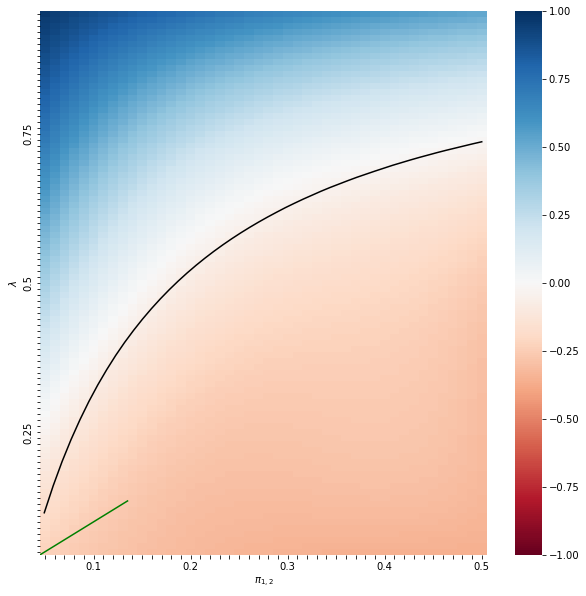

In [85]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_to_map_spline, vmin=-1,vmax=1, cmap='RdBu', ax=ax, xticklabels=x_ticks, yticklabels=y_ticks)
ax.invert_yaxis()
ax.set_xlabel(r"$\pi_{1,2}$")
ax.set_ylabel(r"$\lambda$")
sns.lineplot(x=df_Tline['pi'], y=df_Tline['lambda'], color='black')
sns.lineplot(x=some_line['pi'], y=some_line['lambda'], color='green')

In [86]:
print(lamb_new)

[0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95]
